# Evaluate KS

In [21]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from ctf4science.eval_module import extract_metrics_in_order

In [22]:
# Dataset name
dataset_name = "PDE_KS"

# Baseline batch directories
baseline_batches = [
    "CTF_NaiveBaselines_average/batch_avg_20250415_151250/",
    "CTF_NaiveBaselines_constant/batch_0.0_20250415_151039"
]

# Model batch directories (note: currently using a baseline as a placeholder)
model_batches = [
    "CTF_NaiveBaselines_random/batch_uniform_42_20250415_151240"
]

# Global plotting parameters
font_family = "Arial"  # Professional and widely available font
plt.rcParams["font.family"] = font_family
plt.rcParams["font.size"] = 12        # General text size
plt.rcParams["axes.labelsize"] = 14   # Axis labels
plt.rcParams["axes.titlesize"] = 16   # Title
plt.rcParams["legend.fontsize"] = 12  # Legend
plt.rcParams["xtick.labelsize"] = 10  # Tick labels
plt.rcParams["ytick.labelsize"] = 10

# Color palettes (colorblind-friendly and distinct)
baseline_colormap = plt.cm.viridis   # Cool tones for baselines
model_colormap = plt.cm.inferno      # Warm tones for models

# Line and marker styles
baseline_linestyle = "-"   # Solid lines for baselines
model_linestyle = "--"     # Dashed lines for models
marker_styles = ["o", "s", "D", "^", "v", "<", ">", "p", "*", "h", "H", "+"]  # Distinct markers

In [23]:
# Dictionary to store results for all batches
results = {}

# Combine baselines and models for processing
all_batches = baseline_batches + model_batches

for batch in all_batches:
    # Construct the path to batch_results.yaml
    batch_dir = Path("../results") / dataset_name / batch
    batch_results_path = batch_dir / "batch_results.yaml"
    
    # Load the batch_results.yaml file
    with open(batch_results_path, "r") as f:
        batch_results = yaml.safe_load(f)
    
    # Extract metric values in the correct order
    metric_values = extract_metrics_in_order(dataset_name, batch_results)
    
    # Map values to E1, E2, ..., E12
    e_metrics = {f"E{i+1}": value for i, value in enumerate(metric_values)}
    
    # Store the transformed metrics with the batch path as the key
    results[batch] = e_metrics

# Optional: Display the results to verify
for batch, metrics in results.items():
    print(f"Batch: {batch}")
    print(metrics)
    print()

Batch: CTF_NaiveBaselines_average/batch_avg_20250415_151250/
{'E1': -4.631336398781993, 'E2': 1.4746267524413659, 'E3': 0.22272235606694002, 'E4': 1.2140815935903437, 'E5': 2.6173207210912652, 'E6': 1.2701900910247366, 'E7': -0.5680211773671839, 'E8': 4.1666965056542775, 'E9': -24.709587695615287, 'E10': 20.620923222521892, 'E11': 1.8180977602476278, 'E12': -5.8744644550368985}

Batch: CTF_NaiveBaselines_constant/batch_0.0_20250415_151039
{'E1': 0.0, 'E2': 0.0, 'E3': 0.0, 'E4': 0.0, 'E5': 0.0, 'E6': 0.0, 'E7': 0.0, 'E8': 0.0, 'E9': 0.0, 'E10': 0.0, 'E11': 0.0, 'E12': 0.0}

Batch: CTF_NaiveBaselines_random/batch_uniform_42_20250415_151240
{'E1': -3.5505415625603165, 'E2': -3.3965850938547426, 'E3': -0.326578368583319, 'E4': -4.680614609872724, 'E5': -2.587710773785057, 'E6': -0.881458855111017, 'E7': -4.081905326004498, 'E8': -4.767776993143147, 'E9': -3.8808275425766814, 'E10': -4.302788147609271, 'E11': -4.092237536201115, 'E12': -3.203922983784069}



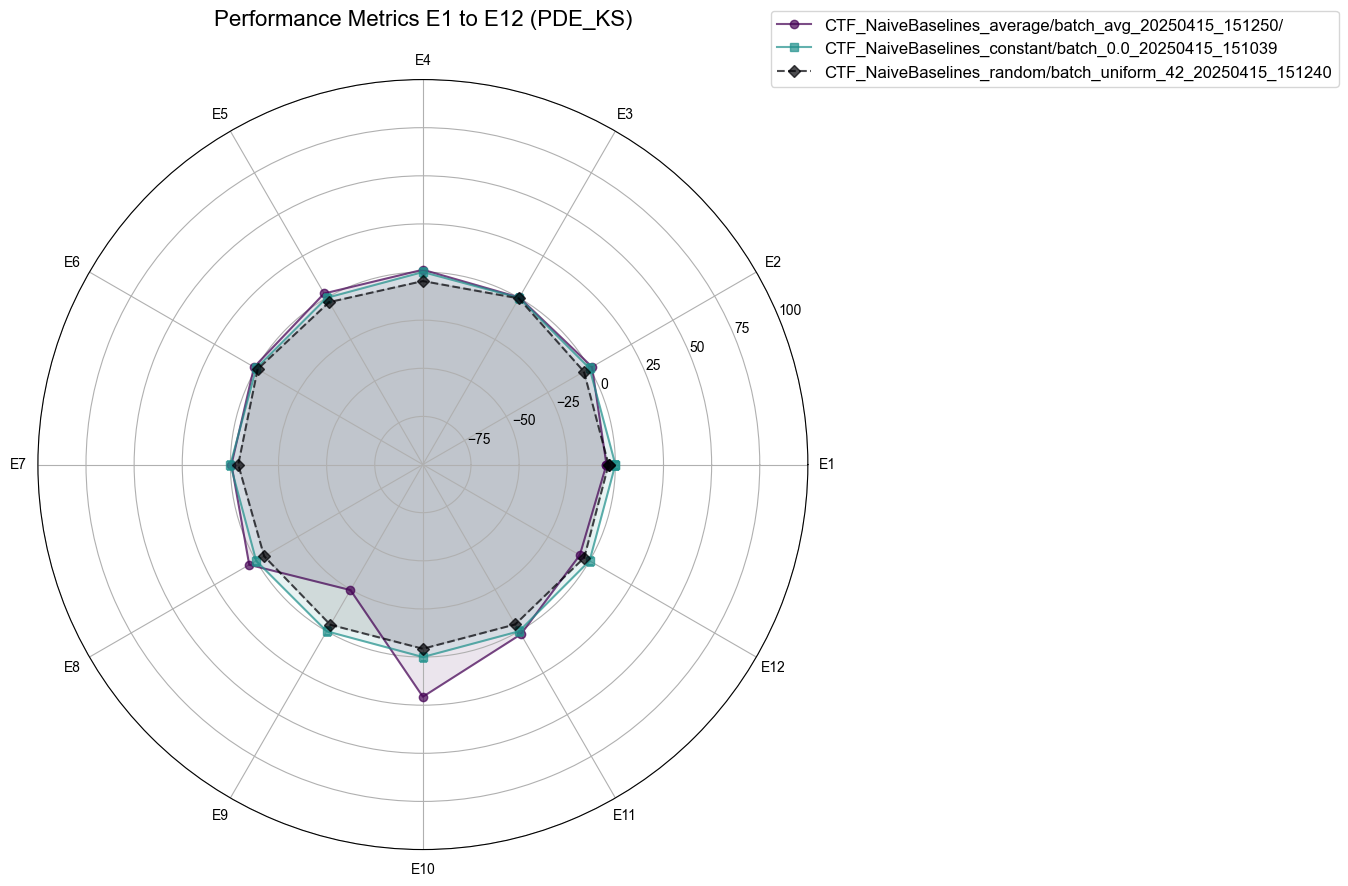

In [24]:
def spider_plot(results, baseline_batches, model_batches, dataset_name):
    """
    Create a spider (radar) plot for the E1 to E12 metrics.
    
    Args:
        results (dict): Dictionary with batch paths as keys and E1-E12 metrics as values.
        baseline_batches (list): List of baseline batch directories (relative paths).
        model_batches (list): List of model batch directories (relative paths).
        dataset_name (str): Name of the dataset for constructing full paths.
    """
    # Categories for the spider plot
    categories = [f"E{i+1}" for i in range(12)]
    N = len(categories)
    
    # Create full batch paths
    all_batches = baseline_batches + model_batches
    
    # Generate colors for each batch
    baseline_colors = [baseline_colormap(i / len(baseline_batches)) for i in range(len(baseline_batches))]
    model_colors = [model_colormap(i / len(model_batches)) for i in range(len(model_batches))]
    colors = baseline_colors + model_colors
    
    # Assign line styles
    linestyles = [baseline_linestyle] * len(baseline_batches) + [model_linestyle] * len(model_batches)
    
    # Create the figure and polar subplot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection="polar"))
    
    # Plot each batch
    for i, batch_path in enumerate(all_batches):
        # Retrieve metrics (assuming results uses full paths as keys)
        values = list(results[str(batch_path)].values())
        # Close the plot by repeating the first value
        values += values[:1]
        # Calculate angles for the categories
        angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
        angles += angles[:1]
        
        # Plot the line and fill the area
        ax.plot(angles, values, label=all_batches[i], color=colors[i], linestyle=linestyles[i], 
                marker=marker_styles[i % len(marker_styles)], alpha=0.7)
        ax.fill(angles, values, color=colors[i], alpha=0.1)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # Set y-axis limits (assuming metrics are percentages; adjust if needed)
    ax.set_ylim(-100, 100)
    
    # Add a legend outside the plot
    ax.legend(loc="upper right", bbox_to_anchor=(1.7, 1.1))
    
    # Add a title
    ax.set_title(f"Performance Metrics E1 to E12 ({dataset_name})", pad=20)
    
    # Display the plot
    plt.show()

# Example call (adjust based on your actual variables)
spider_plot(results, baseline_batches, model_batches, dataset_name)